# Serie de Fourier

Utilice la serie de Fourier continua para aproximar la función de onda cuadrada o rectangular. Para el cálculo del ejemplo se usará hasta 8 términos de la serie.

<center><image src="Picture1.PNG" alt="Functions that are defined piecewise"></center>

#### Calculo coeficiente an y bn

* Para determinar las expresiones de los coeficientes, se usará la libreria Sympy que facilita el desarrollo de fórmulas simbólicas an y bn.

In [15]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [16]:
# INGRESO
T = 2*np.pi

t = sym.Symbol('t')
ft = sym.Piecewise((-1,t <-T/2),
                   (-1,t <-T/4),
                   ( 1,t < T/4),
                   (-1,t < T/2),
                   (-1,True),)

# intervalo
a = -T/2
b = T/2

# número de coeficientes
nCoeficientes = 8

In [17]:
# PROCEDIMIENTO
n  = sym.Symbol('n')
w0 = 2*np.pi/T
print(w0)
sym.pprint(ft)

# Términos an para coseno
enintegral  = ft*sym.cos(n*w0*t)
yaintegrado = sym.integrate(enintegral,(t,a,b))
an = (2/T)*yaintegrado
an = sym.simplify(an)

# Términos bn para seno
enintegral = ft*sym.sin(n*w0*t)
yaintegrado = sym.integrate(enintegral,(t,a,b))
bn = (2/T)*yaintegrado
bn = sym.simplify(bn)

1.0
⎧-1  for t < -3.14159265358979 ∨ t < -1.5707963267949
⎪                                                    
⎨1               for t < 1.5707963267949             
⎪                                                    
⎩-1                     otherwise                    


In [18]:
print('an = ')
sym.pprint(an)

print('bn =')
sym.pprint(bn)


an = 
⎧1.27323954473516⋅sin(1.5707963267949⋅n) - 0.636619772367581⋅sin(3.14159265358
⎪─────────────────────────────────────────────────────────────────────────────
⎨                                         n                                   
⎪                                                                             
⎩                                         0                                   

979⋅n)                                                                        
──────  for (n > -∞ ∨ n > 0) ∧ (n > -∞ ∨ n < ∞) ∧ (n > 0 ∨ n < 0) ∧ (n < 0 ∨ n
                                                                              
                                                                              
                                         otherwise                            

     
 < ∞)
     
     
     
bn =
0


#### Evaluación de coeficientes

* Se evalúan los n coeficientes an y bn, substituyendo en las expresiones los valores en cada índice i.

In [19]:
# Evalua los coeficientes
a0  = an.subs(n,0)/2
b0  = bn.subs(n,0)
ani = [a0]
bni = [b0]
i = 1
while not(i >= nCoeficientes):
    avalor = an.subs(n,i)
    bvalor = bn.subs(n,i)
    ani.append(avalor)
    bni.append(bvalor)
    i = i+1
print('\n coeficientes an: ')
sym.pprint(ani)
print('\n coeficientes bn: ')
print(bni)


 coeficientes an: 
[0, 1.27323954473516, 1.55926873300775e-16, -0.424413181578388, 0, 0.254647908
947032, 1.55926873300775e-16, -0.181891363533595]

 coeficientes bn: 
[0, 0, 0, 0, 0, 0, 0, 0]


#### Expresión de la Serie de Fourier

* Encontrados los coeficientes an y bn, se reemplazan en la expresión principal.

<center><image src="Picture2.PNG" alt="Fourier series main function"></center>

In [20]:
# serie de Fourier
serieF = a0 + 0*t 
i = 1
while not(i >= nCoeficientes):
    serieF = serieF + ani[i]*sym.cos(i*w0*t)
    serieF = serieF + bni[i]*sym.sin(i*w0*t)
    i = i+1
# serie = sym.simplify(serie)

print('\n serie de Fourier fs(t): ')
sym.pprint(serieF)


 serie de Fourier fs(t): 
1.27323954473516⋅cos(1.0⋅t) + 1.55926873300775e-16⋅cos(2.0⋅t) - 0.424413181578
388⋅cos(3.0⋅t) + 0.254647908947032⋅cos(5.0⋅t) + 1.55926873300775e-16⋅cos(6.0⋅t
) - 0.181891363533595⋅cos(7.0⋅t)


#### Gráficas de f(t) y Serie de Fourier

* Para comparar la función f(t) con la aproximación en series de Fourier, se usa el intervalo [a,b] con una cantidad de muestras usando la instrucción np.linspace() y guardando el resultado en ti.

* Para evaluar los puntos ti en cada expresión, por simplicidad se convierte la expresión de su forma simbólica a numérica lambda, usando sym.lambdify()

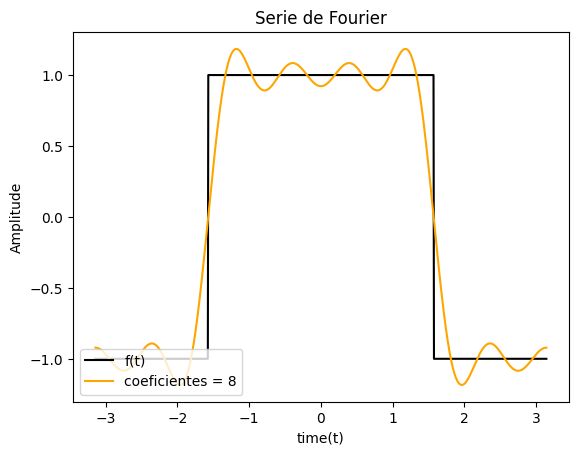

In [21]:
# Para evaluación numérica
fsn = sym.lambdify(t, serieF)
ftn = sym.lambdify(t, ft)

# Evaluación para gráfica
muestras = 1000
ti = np.linspace(a, b, muestras)
fi = ftn(ti)
fsi = fsn(ti) 

# SALIDA
# Grafica
plt.plot(ti, fi, 'black', label = 'f(t)')
etiqueta = 'coeficientes = '+ str(nCoeficientes)
plt.plot(ti, fsi, 'orange', label = etiqueta)
plt.title('Serie de Fourier')
plt.xlabel('time(t)')
plt.ylabel('Amplitude')
plt.legend(loc = "lower left")

###### Fuente: http://blog.espol.edu.ec/telg1001/series-de-fourier-de-funciones-periodicas-con-python/
